# ImageJ:  Pixel size & dimensions

In [1]:
%load_ext autoreload
%autoreload 2

# Default import
import sys
sys.path.append('../../../')
from helpers import *

import numpy as np
from matplotlib import pyplot as plt

## Introduction

This section will explore pixel sizes and dimensions in ImageJ.
Along the way, we will see how to generate scale bars and fix images where the pixel size or dimensions are incorrect -- at least whenever we know what the correct values are.

## Pixel sizes & Properties

You can see the pixel size for an image in ImageJ under {menuselection}`Image --> Properties...`.
These are provided separately as values for {guilabel}`Pixel width` and {guilabel}`Pixel height`.

```{margin}
A **voxel** is the 3D analogue of a pixel; a 'volume pixel'.
```

There is also an additional value, {guilabel}`Voxel depth`, which is only relevant for *z*-stacks; this gives the spacing between *z*-slices.

```{figure} images/confocal-properties.png
---
align: center
width: 60%
name: fig-properties_confocal
---
Image properties for the *Confocal Series* sample, which include the pixel size.
```

If the pixel size information is unavailable, the pixel sizes are given as 1 pixel: not terribly informative.
Otherwise, the pixel sizes are given in the units displayed nearby in the properties dialog.

```{figure} images/fluorescent-properties.png
---
align: center
width: 60%
name: fig-properties_fluorescent
---
Image properties for the *Fluorescent Cells* sample, which do not include useful pixel size information.
```

The pixel width and height are *usually* the same.
The voxel depth (where relevant) is often different.

````{tab-set}

```{tab-item} Question


One way to check if the pixel size information is set for an image is to use {menuselection}`Image --> Properties...`

How else can you check this, even more easily?

**Tip:** The answer should already be visible in {numref}`fig-properties_confocal` and {numref}`fig-properties_fluorescent`.
```

```{tab-item} Answer
The size of the image is given at the top of each image window.
If the pixel size information is available, this is given in calibrated units.
Otherwise, it is given only in pixels.
```

````

### Pixel sizes & measurements

As [described before](sec_imagej_measure_calibration), the pixel size influences measurements in ImageJ -- but the units don't appear anywhere in the *Results table*.
Furthermore, once a measurement is added to the *Results table* it is fixed: it won't automatically update if the pixel sizes are changed later.

For that reason, you need to be careful to check pixel sizes *before* making any measurements and make sure it's clear to you which units have been used.

```{figure} images/imagej-pixel-size-measure.png
---
align: center
width: 60%
name: fig-imagej_pixel_size_measure
---
The same ROI (here, a 100 x 100 pixel square) can appear to have a different area if it is measured on images that have different pixel sizes.
The measurement is converted before being added to the *Results table*, but the units are not included.
```


### Setting the pixel size

If the pixel size information is missing, but you know what it should be, you can simply enter the required width and height values in the *Properties...* dialog box.

:::{admonition} Typing µm
:class: tip

Depending upon your computer, typing µm for the units might be tricky.
Fortunately, typing *um* works as well -- ImageJ automatically converts *um &rarr; µm*.

:::

If you don't know what the pixel size should be, but you *do* know the length of some structure in your image, then you can
* Draw a line along the known structure with the line tool <img src="../../../images/imagej/icons/line.png" />
* Run {menuselection}`Analyze --> Set Scale...`.

This will automatically populate the {guilabel}`Distance in pixels` based upon the length of the line.
You can then input the known physical length and units, then click {guilabel}`OK`.
You should check {menuselection}`Image --> Properties...` to confirm that the values have been updated sensibly.

```{figure} images/pixels-set-scale-ruler.png
---
align: center
width: 90%
name: fig-pixels_set_scale
---
Setting the pixel size in an image by inserting the length of a known structure.
```

:::{admonition} Using *Set Scale...*
:class: tip

Ideally, {menuselection}`Analyze --> Set Scale...` would be used with a calibration slide to establish the pixel sizes reliably.
The values can then be transferred to other images acquired with the same settings using {menuselection}`Image --> Properties...` (or a [macro](chap_macro_intro)).

Beware that, if you have drawn a line as described above, the {guilabel}`Distance in pixels` value is initialized from that line -- so *don't* change that.
Rather, *do* change the {guilabel}`Known distance` and {guilabel}`Unit of length` values according to the physical length indicated by the line.

If the {guilabel}`Unit of length` should be *µm* but your keyboard lacks a *µ*, you can type *um* instead.
:::

### Showing a scale bar

It's generally good practice to include a scalebar in any figures.
This is only really meaningful if the pixel sizes are set correctly within the image properties.

You can create a scalebar using {menuselection}`Analyze --> Tools --> Scale Bar...`.

```{figure} images/scale-bar.png
---
align: center
width: 60%
name: fig-scale_bar
---
Setting a scale bar as an overlay.
```

There are several options that can be used to adjust the appearance of the scalebar.
One of the most important is the {guilabel}`Overlay` option, because this determines whether the scalebar is 'burned in' to the image (i.e. the pixel values are modified) or if it's instead added as a (text) ROI as part of the image overlay.

My advice is to always add the scalebar as an overlay.
That means you can remove it again, or adjust its appearance.
The only disadvantage is that, if you save the image immediately, it might not appear in other software.
The solution is to [generate an RGB image](sec_imagej_flatten) that includes the overlay as a final step before saving, by using {menuselection}`Image --> Overlay --> Flatten`.


## Stacks & Hyperstacks

2D images have been around since the beginning.
Then ImageJ supported **stacks**, which allowed an extra dimension that could either include different time points or *z*-slices -- but not both.
Nowadays, **hyperstacks** are the more flexible derivative of stacks, and can (currently) store up to 5 dimensions without getting them confused.


:::{admonition} Hyperstack flexibility
:class: info

A hyperstack can contain 0–5 dimensions, while a stack can only contain 0–3.
So why worry about stacks at all?

The main reason comes from ImageJ's evolution over time.
Some commands -- perhaps originating in the pre-hyperstack era -– were written only for 2D or 3D data.
Trying to apply them to 4D or 5D images may then cause an error, or it may simply produce strange results.

In practice, this is unlikely to be an issue nowadays.
Hyperstacks have been around for so long now that all major commands that work on stacks should also handle hyperstacks properly.
Nevertheless, it helps to have a historical perspective to understand why both terms still exist in ImageJ's interface.

It may also help if you encounter some very old plugin that was written for stacks but that doesn't handle hyperstacks properly.
:::



### Navigating dimensions

With a stack or hyperstack, only a single 2D **slice** is 'active' at any one time.
A (hyper)stack image window can have up to 3 sliders, used to navigate the **channels**, **z** and **time** dimensions and select the active slice.
In the case of multichannel images (where there is a 'channel' dimension), any changes to lookup tables are made for all the slices on the currently-active channel.

```{figure} images/imagej-dimensions-mitosis.png
---
align: center
width: 60%
name: fig-imagej_dimensions_mitosis
---
A 5D image viewed in ImageJ.
```


### Correcting dimensions

Like the pixel size, the dimensions of an image can found under {menuselection}`Image --> Properties...`.

Sometimes the dimensions can be incorrect.
This might happen, for example, if different *z*-slices were wrongly interpreted as time points when a file was opened, or the presence of multiple channels was not spotted.
Misinterpreting the dimensions can not only affect the display of the image, but also some processing and measurements.

It's also possible to change the dimensions through {menuselection}`Image --> Properties...`, but I find that can sometimes be unreliable because of the old stack/hyperstack distinction (i.e. it doesn't convert a stack to a hyperstack, and therefore doesn't display all the sliders that are needed).
A better option is to use {menuselection}`Image --> Hyperstack --> Stack to Hyperstack...` to fix dimensions.

````{tab-set}

```{tab-item} Practical


Something terrible has befallen the file *lost_dimensions.tif*, so that it's displayed as a 3D stack, when in reality it should have more dimensions.

By inspecting the file, identify how many channels, *z*-slices and time points it originally contained, and set these using {menuselection}`Image --> Hyperstack --> Stack to Hyperstack...` so that it displays properly.
What are the correct dimensions?

[![launch ImageJ.JS](https://ij.imjoy.io/assets/badge/open-in-imagej-js-badge.svg)](https://ij.imjoy.io/?open=https://github.com/bioimagebook/practical-data/blob/main/images/lost_dimensions.tif)
```


```{tab-item} Solution
*lost_dimensions.tif* should contain 2 channels, 3 *z*-slices and 16 time points.

The dimensions are in the default order (*xyczt*).
```

````

### Plots and profiles

More dimensions can make data harder to visualize and interpret.
Reducing dimensions can help.

{menuselection}`Analyze --> Plot Profile` can be used to generate a 1D plot of pixel values along a line within the image.
To use it, you can first draw a line ROI <img src="../../../images/imagej/icons/line.png" />.
By default, pixel values occurring along the line will be displayed in the plot, however it's possible to average multiple pixels perpendicular to line if needed.
To do this, double-click on the line tool and adjust the {guilabel}`Line width` value.

It's also possible to apply {menuselection}`Analyze --> Plot Profile` {kbd}`K` to a rectangle <img src="../../../images/imagej/icons/rectangle.png" />, in which case it will average pixels vertically (default) or horizontally (if the {kbd}`Alt` key is pressed).

::::{margin}
:::{image} images/imagej-dimensions-z-profile.png
:width: 60%
:::
::::

::::{margin}
:::{image} images/imagej-dimensions-t-profile.png
:width: 60%
:::
::::

Another option if you have a stack or hyperstack is to use {menuselection}`Image --> Stacks --> Plot Z-axis Profile` to generate a profile across the slices.
This essentially plots the mean value within any ROI (or across the whole image) for every slice in the stack.
Perhaps unexpectedly, the same command is able to generate a profile across time points as well; when necessary, a dialog is shown to choose the dimension.

In all cases, profile plots contain a {guilabel}`Live` button.
This means the plot data updates as any changes are made to the image, including ROIs being generated and moved around.

```{figure} images/imagej-dimensions-profiles.png
---
align: center
name: fig-imagej_dimensions_profiles
---
Three different profile plots, based on a rectangle.
*(Top)* A regular profile plot from the active 2D slice, using {menuselection}`Analyze --> Plot Profile`.
*(Bottom)* Profiles generated by {menuselection}`Image --> Stacks --> Plot Z-axis Profile` along the z-axis *(left)* and across time points *(right)*.
```

`````{tab-set}

````{tab-item} Practical


Create a profile plot from any image, by drawing a line ROI and pressing {kbd}`K`.

As far as ImageJ is concerned, the profile plot itself is an image -- albeit a strange one.
This means you can use {menuselection}`Image --> Properties...` to check the pixel size *of the profile plot*.

What do you notice about the pixel sizes?

[![launch ImageJ.JS](https://ij.imjoy.io/assets/badge/open-in-imagej-js-badge.svg)](https://ij.imjoy.io/?run=https://gist.github.com/petebankhead/a45e4eed3a90b6374ec7b272db090ec9)
````

````{tab-item} Solution
You will probably see that the pixel width and height are different.
In fact, the pixel width depends upon the scaling of the x-axis and the pixel height depends upon the scaling of the y-axis.

This can be quite useful, because it means you can make measurements within the profile plot itself.

If you want to measure a distance along the x or y axis, you can use the line tool <img src="../../../images/imagej/icons/line.png" /> while pressing {kbd}`Shift`.
This forces the line to be perfectly horizontal or perfectly vertical; without {kbd}`Shift` it would be easy to draw a line at a slight diagonal that could give incorrect results.

```{image} images/imagej-dimensions-profiles-plot.png
---
align: center
---
```
````

`````



## Displaying dimensions

### Z-projections

The command to generate a [*z*-projection](sec_dims_z_project) in ImageJ is {menuselection}`Image --> Stacks --> Z Project...`.
This supports several different projection types, as shown in {numref}`fig-visualize_fiji_projection`.

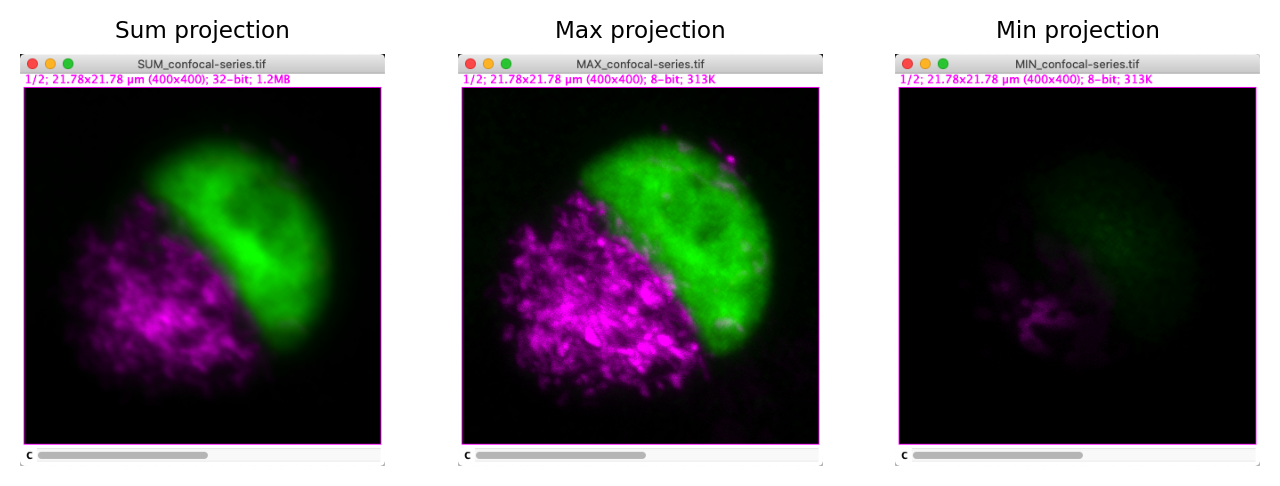

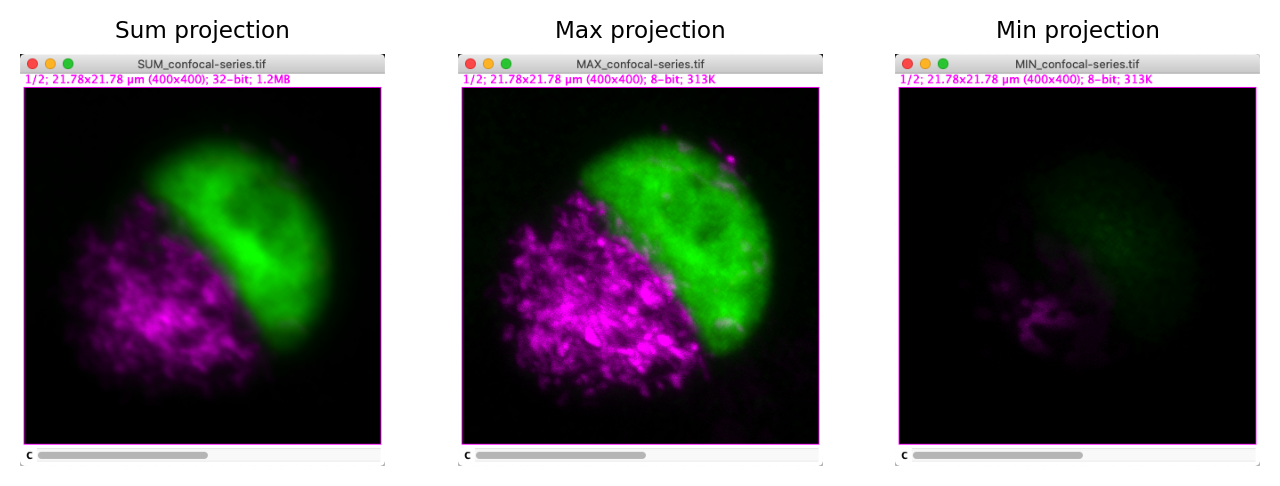

In [2]:
fig = create_figure(figsize=(8, 4))
show_image('images/z-project-sum.png', title='Sum projection', pos=131)
show_image('images/z-project-max.png', title='Max projection', pos=132)
show_image('images/z-project-min.png', title='Min projection', pos=133)
glue_fig('fig_dimensions*z*project', fig)

```{glue:figure} fig_dimensions*z*project
---
align: center
name: fig-visualize_fiji_projection
---
Three projections of a *z*-stack. Sum projections often look similar to maximum projections, but less sharp.
```

````{tab-set}

```{tab-item} Question


Imagine computing a sum and a maximum projection of a 10-slice stack containing a large, in-focus nucleus.
How might each of these projections be affected if your stack contained:

* 4 additional, out-of-focus slices (with non-zero pixel values)
* several very bright, isolated, randomly distributed outlier pixels – with values twice what they should be (due to noise)
```


```{tab-item} Answer

Additional, out-of-focus planes will have an effect upon sum projections: increasing all the resulting pixel values.
However, the extra planes would have minimal effects upon maximum projections, since they are unlikely to contain higher values than the in-focus planes.

Maximum projections will, however, be very affected by bright outliers: these will almost certainly appear in the result with their values unchanged.
Such outliers would also influence a sum projection, but less drastically because each pixel would contain the sum of 9 reasonable values and only 1 large value (unless, by bad luck or a dubious detector, many outliers happen to overlap at the same _xy_ coordinate).
```

````

::::{margin}
:::{image} images/pixels-max-max-mitosis.png
:width: 60%
:::
::::

`````{tab-set}

````{tab-item} Practical


What happens if you calculate a maximum projection *twice* for the 5D image {menuselection}`File --> Open samples --> Mitosis`?

By this I mean you run {menuselection}`Image --> Stacks --> Z Project...` on the original image, and then again on the output of the first projection.

[![launch ImageJ.JS](https://ij.imjoy.io/assets/badge/open-in-imagej-js-badge.svg)](https://ij.imjoy.io/?run=https://gist.github.com/petebankhead/9dbe7657bb476ea457f14229e93c5862)

````

```{tab-item} Solution

You should end up with a maximum *z*-projecton followed by a time projection!

If there is a time dimension but no *z* dimension, {menuselection}`Image --> Stacks --> Z Project...` will use time instead.

If there *is* a *z* dimension but you want a time projection anyway, you could try careful use of {menuselection}`Image --> Hyperstack --> Re-order Hyperstacks...` or {menuselection}`Image --> Hyperstack --> Stack to Hyperstack...` to temporarily switch the dimension names and trick ImageJ into doing what you want.

```

`````

### Orthogonal views

The command {menuselection}`Image --> Stacks --> Orthogonal Views` makes it possible to generate interactive [orthogonal slices](sec_dims_orthogonal) from an image stack.
This opens up 2 extra windows, so that when you click at any point on the original _xy_ view, you are shown cross-sections through that point from each direction.

```{figure} images/orthogonal-views.png
---
align: center
width: 60%
name: fig-orthogonal_views
---
Orthogonal views in ImageJ.
```

Note that when viewing the orthogonal slices, clicks on the image are intercepted.
This makes it difficult to interact with the image normally or create new ROIs.
If you close any of the additional views then the command is deactivated, and you can go back to working with the image as before.

#### Reslicing

If you look closely at the orthogonal slices, you will see that they are RGB images -- even if the original stack is not RGB.
They are also locked to using the LUT and brightness/contrast settings that were active when the command was first run.

This makes them a useful visualization trick, but they do not provide a rotated version of the data for analysis.

If you instead want to rotate the entire stack so that you can browse through what are effectively _xz_ or _yz_ slices and do whatever you want to them, the command you need is {menuselection}`Image --> Stacks --> Reslice...`.

```{figure} images/reslicing.png
---
align: center
width: 90%
name: fig-reslicing
---
Reslicing an image.
```

After reslicing, you can then use {menuselection}`Image --> Stacks --> Z Project...` to effectively generate orthogonal *z*-projections.

:::{admonition} Reslicing and interpolation
:class: tip

Interpolation effectively means making up plausible new pixel values to fill in the gaps 'between' known pixels.
In this case, interpolation handles the fact that the pixel width, pixel height and voxel depth (*z*-spacing) are seldom identical.

With that in mind, if you need to reslice an image then I recommend trying it both with and without {guilabel}`Avoid pixel interpolation` selected, checking the pixel size under {menuselection}`Image --> Properties...` in both cases.
Seeing what actually happens is likely to be more informative than trying to make sense of any explanation I could try to give.

:::